## Exploring the data

In [63]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load the data
df = pd.read_csv("UsArrests.csv")
print(df.head())

         City  Murder  Assault  UrbanPop   Rape
0     Alabama  13.200      236        58 21.200
1      Alaska  10.000      263        48 44.500
2     Arizona   8.100      294        80 31.000
3    Arkansas   8.800      190        50 19.500
4  California   9.000      276        91 40.600


In [64]:
print('Number of cases: {} Number of features: {}'.format(df.shape[0],df.shape[1]))

Number of cases: 50 Number of features: 5


The output should be (50, 5), indicating that the dataset contains 50 observations (rows) and 5 features (columns).

In [65]:
#To set the decimal precision:
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

#The describe function give us insight into the statistical properties of the columns
stats = df.describe()
selected_stats = stats.loc[["mean","std","min","max"]].transpose() #select relevant rows
selected_stats

,mean,std,min,max
Murder,7.79,4.36,0.80,17.40
Assault,170.76,83.34,45.00,337.00
UrbanPop,65.54,14.47,32.00,91.00
Rape,21.23,9.37,7.30,46.00


In [66]:
# Count missing values
missing = df.isnull().sum()
relevant_missing = pd.DataFrame(missing, columns=["missing"])
relevant_missing

,missing
City,0
Murder,0
Assault,0
UrbanPop,0
Rape,0


The output shows that there are no missing values or duplicates.

In [68]:
# Examine types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


/Users/elsytheledi/Library/Python/3.11/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/elsytheledi/Library/Python/3.11/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/elsytheledi/Library/Python/3.11/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/elsytheledi/Library/Python/3.11/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

<Axes: >

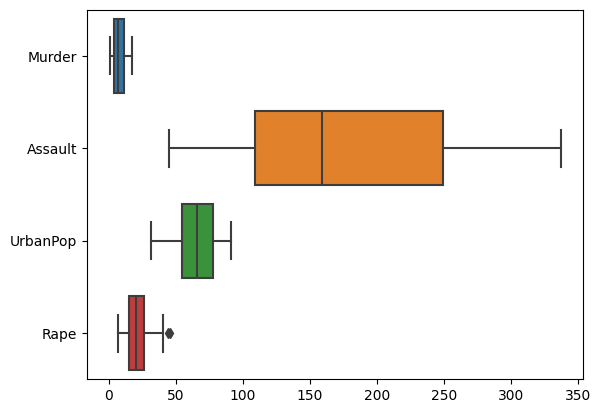

In [69]:
sns.boxplot(data=df, orient="h") # Check for outliers using boxplot

Assault Rates are Generally Higher:
The boxplot reveals that the median Assault rate is relatively high, suggesting that, on average, states experience a considerable number of assault incidents per 100,000 residents.
Varying Murder Rates:
While Assault rates are generally higher, Murder rates exhibit significant variability. There are states with both high and low Murder rates, as indicated by the spread of the boxplot.
No Direct Correlation Between Assault and Murder Rates:
The boxplot shows that a high Assault rate does not consistently lead to a high Murder rate. States with high Assault rates may have varying Murder rates, and vice versa.

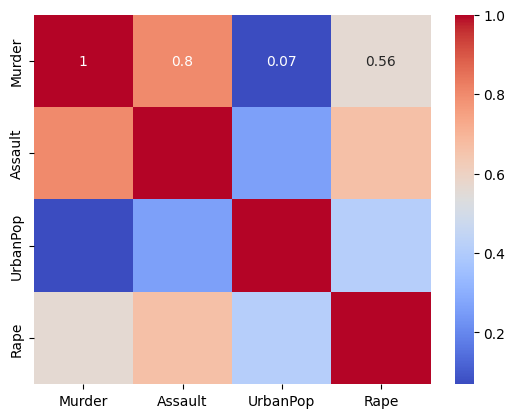

In [70]:


# Exclude non-numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Check correlation among features using heatmap
corr = numeric_columns.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()


Urban Population and Crime Rates:

The heatmap reflects the relationship between Urban Population and crime rates. While there isn't a clear pattern, it indicates a somewhat positive correlation. This implies that states with higher urban populations may, to some extent, exhibit higher crime rates.

Insights for Policy and Intervention:

Policymakers can use these correlation patterns to inform targeted interventions. For instance, addressing factors contributing to high Assault rates may have a positive impact on Murder rates, given their observed correlation.

Holistic Crime Prevention Strategies:

The heatmap emphasizes the importance of adopting holistic crime prevention strategies. Effective interventions should consider the interconnected nature of different crime categories and address underlying socio-economic factors.

In [71]:
# Create summary table
frames = [relevant_missing,selected_stats]
summary = pd.concat(frames, axis=1)
summary.rename(columns = {0:"missing"}, inplace = True)
summary.to_csv('summary.csv', index=True) 
summary

,missing,mean,std,min,max
City,0,NaN,NaN,NaN,NaN
Murder,0,7.79,4.36,0.80,17.40
Assault,0,170.76,83.34,45.00,337.00
UrbanPop,0,65.54,14.47,32.00,91.00
Rape,0,21.23,9.37,7.30,46.00


The dataset exhibits no missing values. The mean murder rate is 7.79, with a standard deviation of 4.36, ranging from 0.80 to 17.40. Assault rates average at 170.76, displaying a high standard deviation of 83.34, ranging from 45.00 to 337.00. Urban population percentages show a mean of 65.54, a standard deviation of 14.47, and a range from 32.00 to 91.00. The average rape rate is 21.23, with a standard deviation of 9.37, fluctuating between 7.30 and 46.00. Notably, the data suggests that while assault rates vary widely, they do not consistently correlate with murder or rape rates, indicating the need for a nuanced approach to crime prevention and urban development.

## PCA

In [72]:
# Extract features (excluding the City column)
features = df.drop('City', axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform PCA
pca = PCA()
X_trans = pca.fit_transform(scaled_features)

# Create a DataFrame for the principal components
df_pca = pd.DataFrame(X_trans)

# Display standard deviation, proportion of variance explained, and cumulative proportion
std = df_pca.describe().transpose()["std"]
print(f"Standard deviation: {std.values}")
print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")
print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_)}")




Standard deviation: [1.59 1.   0.6  0.42]
Proportion of Variance Explained: [0.62 0.25 0.09 0.04]
Cumulative Proportion: [2.53 3.54 3.9  4.08]


In [73]:
countries = df.index
corr_df = df.drop(["City"],axis=1).corr()
labels =corr_df.columns

correlations = corr_df.corr()

In [74]:
# Feature importance
pd.set_option('display.float_format', lambda x: '%.3f' % x) #change precision to see more decimal places

pc1 = abs( pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.536,0.418
1,Assault,0.583,0.188
2,UrbanPop,0.278,0.873
3,Rape,0.543,0.167


<Axes: >

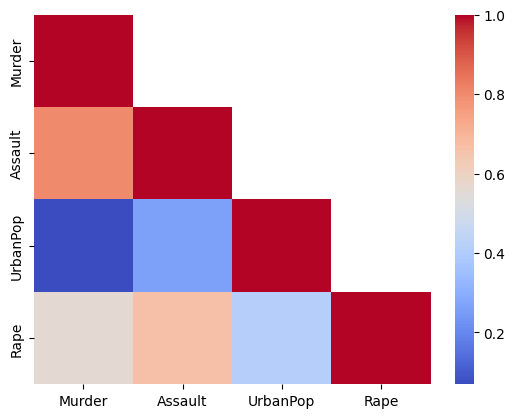

In [75]:
import seaborn as sns
mask_ut = np.triu(np.ones(corr_df.shape), k=1).astype(bool)
sns.heatmap(corr_df, mask=mask_ut, cmap="coolwarm")



The heatmap generated from the correlation matrix provides insights into the relationships among the features. A positive correlation is observed between assault and murder rates, while rape rates exhibit a weaker positive correlation with assault and murder. The urban population percentage shows a negative correlation with murder and assault rates, suggesting that higher urbanization may be associated with lower crime rates.

In [76]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)

df_std_pca = pd.DataFrame(X_std_trans)
df_std_pca.head()

,0,1,2,3
0,0.986,1.133,-0.444,0.156
1,1.950,1.073,2.040,-0.439
2,1.763,-0.746,0.055,-0.835
3,-0.141,1.120,0.115,-0.183
4,2.524,-1.543,0.599,-0.342


In [77]:
# Feature importance

pc1 = abs( std_pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( std_pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.536,0.418
1,Assault,0.583,0.188
2,UrbanPop,0.278,0.873
3,Rape,0.543,0.167


### K-means clustering


/Users/elsytheledi/Library/Python/3.11/lib/python/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


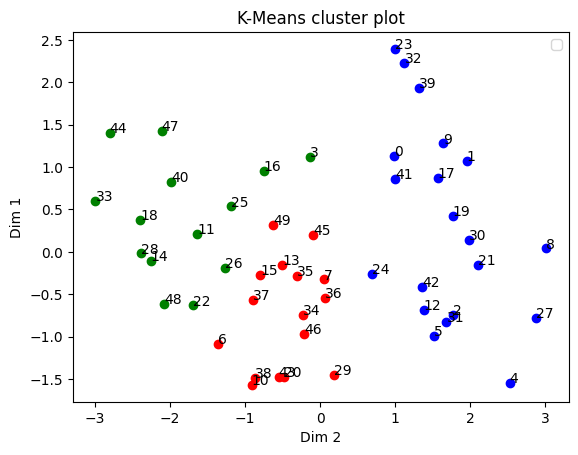

In [78]:
from sklearn.cluster import KMeans

# Fit k-means
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(df_pca)

# Plot clusters
x = X_trans[:, 0]
y = X_trans[:, 1]

fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(0, k):
    ax.scatter(x[cluster_labels == i], y[cluster_labels == i], c=colours[i]) 

for i in range(0, len(x)):
    txt = df.index[i]
    ax.annotate(txt, (x[i], y[i]))

ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend()


In [79]:
# Display groups
clusters = pd.DataFrame()

group0_indices = np.argwhere(cluster_labels == 0).transpose()[0]
group1_indices = np.argwhere(cluster_labels == 1).transpose()[0]
group2_indices = np.argwhere(cluster_labels == 2).transpose()[0]

group0 = np.array(df.index)[group0_indices]
group1 = np.array(df.index)[group1_indices]
group2 = np.array(df.index)[group2_indices]

print("Group 0: {}\n\n".format(group0))
print("Group 1: {}\n\n".format(group1))
print("Group 2: {}\n\n".format(group2))
plt.show()


Group 0: [ 6  7 10 13 15 20 29 34 35 36 37 38 43 45 46 49]


Group 1: [ 0  1  2  4  5  8  9 12 17 19 21 23 24 27 30 31 32 39 41 42]


Group 2: [ 3 11 14 16 18 22 25 26 28 33 40 44 47 48]




the generated clusters visually separate the data into distinct groups. Each point on the cluster plot represents a state, and the colors indicate the assigned cluster. This analysis partitions the states into three groups based on their characteristics, providing a basis for understanding similarities or differences among them. Group 0, Group 1, and Group 2 represent clusters with specific features that distinguish them from each other. Further exploration of these clusters could reveal commonalities in terms of social, economic, or geographical factors that contribute to their grouping.